## Generating maps and mosaic

In this chapter we will see how to generate vignetting corrected sky maps based on pre-generated count maps, background maps and exposure maps.<br/>

### Step 1)
To start try to produce a  vignetting corrected, background subtracted map for MOS1 and MOS2 independently.
In the data directory, three poitings of the large (1° diameter) SNR RX J1713 have been pre-processed in the 0.5-2 keV energy band.
For each observation and for each MOS1, MOS2 cameras, three images are availabe:<br/>

\*IMAGE\*FTZ:  count map   <br/>
\*BKGND\*FTZ:  background map from Blank Sky observations <br/>
\*EXPMAP\*FTZ:  exposure map  <br/>


### Step 2)
Try to redo the same process but this time to create a small mosaic by mosaicing together MOS1+MOS2 cameras in all three observations.


In [1]:
#Let's get started by loading the usual modules
%matplotlib inline
from __future__ import  division, print_function
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from astropy.io import fits
from astropy import table, wcs
from astropy.convolution import convolve,convolve_fft, Gaussian2DKernel
from matplotlib.colors import PowerNorm,LogNorm

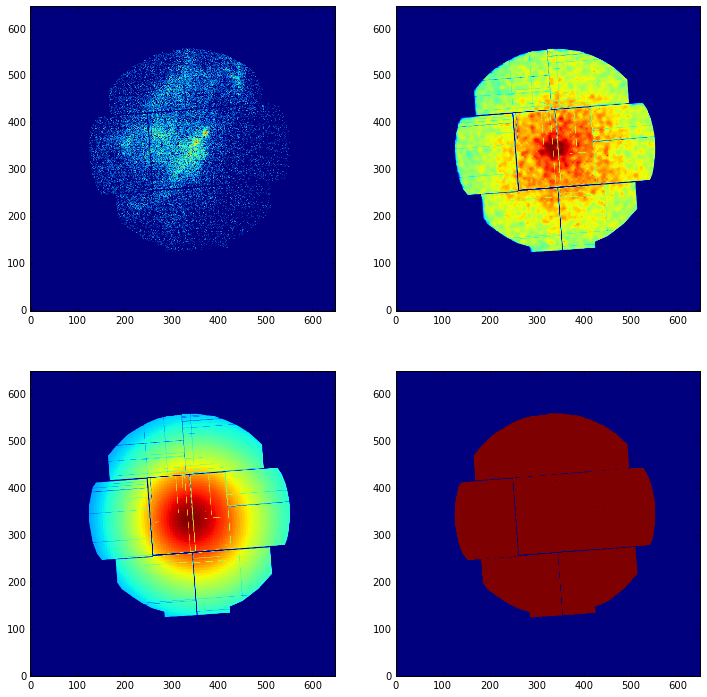

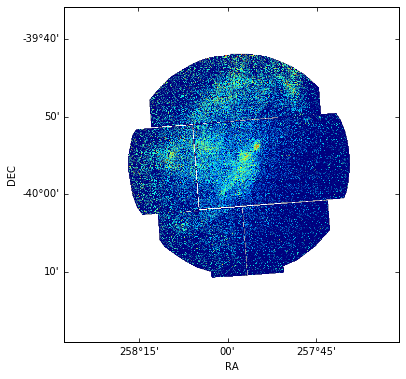

In [51]:
datadir='data/'
imagefile=datadir+'P0093670301M2S003IMAGE_2000.FTZ'
bkgfile=datadir+'P0093670301M2S003BKGND_2000.FTZ'
expfile=datadir+'P0093670301M2S003EXPMAP2000.FTZ'


def build_plot(imagefile,bkgfile,expfile):
    threshold = 0.05 #keep only regions where the exposure contrast is no lower than XX%

    image=fits.getdata(imagefile)
    bkg=fits.getdata(bkgfile)
    exp=fits.getdata(expfile)

    hdr=fits.getheader(imagefile)
    w = wcs.WCS(hdr)

    mask_idx = np.where(exp > np.max(exp)*threshold)
    mask=np.zeros_like(exp)
    mask[mask_idx] = 1

    im = (image-bkg)/exp *mask

    fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2, 2, figsize=(12,12))

    ax1.imshow(image,origin='lower',norm=PowerNorm(0.5) )
    ax2.imshow(bkg,origin='lower')
    ax3.imshow(exp,origin='lower')
    ax4.imshow(mask,origin='lower')
    plt.show()
    
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1, 1, 1, projection=w)

    ax.imshow(im,origin='lower', norm=PowerNorm(0.5) )
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    
build_plot(imagefile,bkgfile,expfile)    

## Step 2)

Try to redo the same process but this time to create a small mosaic by mosaicing together MOS1+MOS2 cameras in all three observations.

To stitch images together you can use the SAS command emosaic. Example:<br/>
<pre> emosaic imagesets="image1.fits image2.fits" mosaicedset=mosaic.fits </pre>

To execute a shell command use within python:

<pre>subprocess.call('emosaic imagesets="image1.fits image2.fits" mosaicedset=mosaic.fits', shell=True) </pre>


Tips:<br/>
To select all files matching a regular expression use the glob module.<br/>
<pre>
import glob
for file in glob.glob('*IMAGE*FTZ'):
    print(file)</pre>
    


Create a command to mosaic the XMM count map, exposure map and bkg map of MOS1+MOS2 to create a mosaic of the several observations. <br/>
It's easier to create a full mosaic of cmap, exp map, bkg map for each instruments then sum it. 

In [32]:
import glob
import subprocess
imlist=''


for file in glob.glob('data/*EXPMAP*FTZ'):
    imlist+=file+' '
    print(file)

cmd='emosaic imagesets="%s" mosaicedset=data/mosaic_expmap.fits' %(imlist)
print(cmd)

data/P0093670301M1S002EXPMAP2000.FTZ
data/P0093670301M2S003EXPMAP2000.FTZ
data/P0203470501M1S002EXPMAP2000.FTZ
data/P0203470501M2S003EXPMAP2000.FTZ
data/P0207300201M1S001EXPMAP2000.FTZ
data/P0207300201M2S002EXPMAP2000.FTZ
emosaic imagesets="data/P0093670301M1S002EXPMAP2000.FTZ data/P0093670301M2S003EXPMAP2000.FTZ data/P0203470501M1S002EXPMAP2000.FTZ data/P0203470501M2S003EXPMAP2000.FTZ data/P0207300201M1S001EXPMAP2000.FTZ data/P0207300201M2S002EXPMAP2000.FTZ " mosaicedset=data/mosaic_expmap.fits


In [33]:
subprocess.call(cmd, shell=True)

0

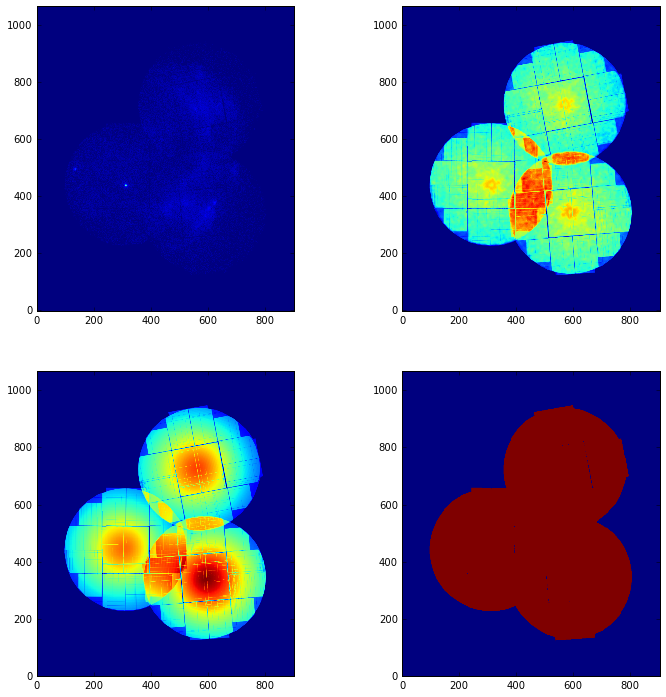

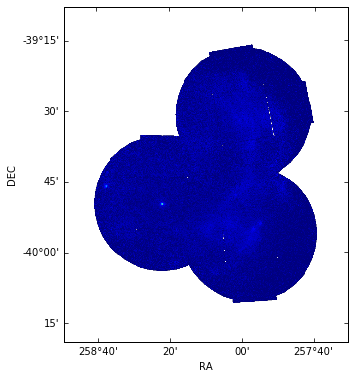

In [52]:
build_plot('data/mosaic_cmap.fits','data/mosaic_bkgmap.fits','data/mosaic_expmap.fits')    